In [1]:
import cv2

In [2]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from pursuit import PursuitEnv
from stable_baselines3.common.callbacks import CheckpointCallback
import os
LOAD_PATH = r"C:\Users\cherniak\pet_projects\Self-driving-RL-car\logs\train_to_reach target\default_SB_5\checkpoints\rl_model_82944000_steps.zip"

obs_storage = []
acts = []
if True:
    env = make_vec_env(lambda: PursuitEnv(render=True), n_envs=1)
    model = PPO.load(LOAD_PATH, env=env, device="cpu")
    vec_env = model.get_env()
    obs = vec_env.reset()
    while True:
        obs_storage.append(obs)
        action, _states = model.predict(obs, deterministic=True)
        acts.append(action)
        obs, rewards, dones, info = vec_env.step(action)
        if dones[0]:
            break
cv2.destroyAllWindows()

In [3]:
model.policy

MultiInputActorCriticPolicy(
  (features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acceleration): Flatten(start_dim=1, end_dim=-1)
      (orientation): Flatten(start_dim=1, end_dim=-1)
      (steering): Flatten(start_dim=1, end_dim=-1)
      (steering_speed): Flatten(start_dim=1, end_dim=-1)
      (tgt_x): Flatten(start_dim=1, end_dim=-1)
      (tgt_y): Flatten(start_dim=1, end_dim=-1)
      (velocity): Flatten(start_dim=1, end_dim=-1)
      (x): Flatten(start_dim=1, end_dim=-1)
      (y): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (pi_features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acceleration): Flatten(start_dim=1, end_dim=-1)
      (orientation): Flatten(start_dim=1, end_dim=-1)
      (steering): Flatten(start_dim=1, end_dim=-1)
      (steering_speed): Flatten(start_dim=1, end_dim=-1)
      (tgt_x): Flatten(start_dim=1, end_dim=-1)
      (tgt_y): Flatten(start_dim=1, end_dim=-1)
      (velocity): Flatten(start_dim=1, end_dim=

In [4]:
import matplotlib.pyplot as plt

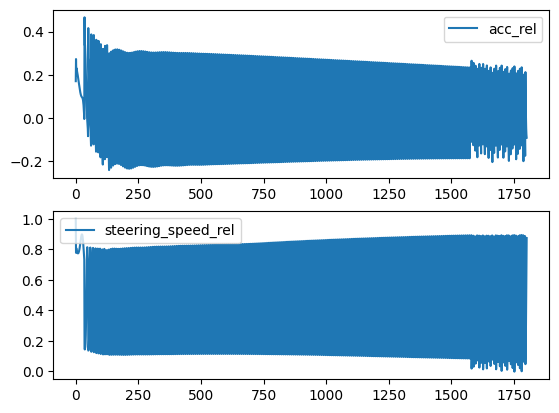

In [5]:
fig, ax = plt.subplots(2)
ax[0].plot([a[0][0] for a in acts], label="acc_rel")
ax[0].legend()
ax[1].plot([a[0][1] for a in acts], label="steering_speed_rel")
ax[1].legend()

In [6]:
acc = [o["acceleration"].item() for o in obs_storage]
vel = [o["velocity"].item() for o in obs_storage]
orient = [o["orientation"].item() for o in obs_storage]
steer = [o["steering"].item() for o in obs_storage]
x = [o["x"].item() for o in obs_storage]
y = [o["y"].item() for o in obs_storage]
tgt_x = obs_storage[0]["tgt_x"].item()
tgt_y = obs_storage[0]["tgt_y"].item()

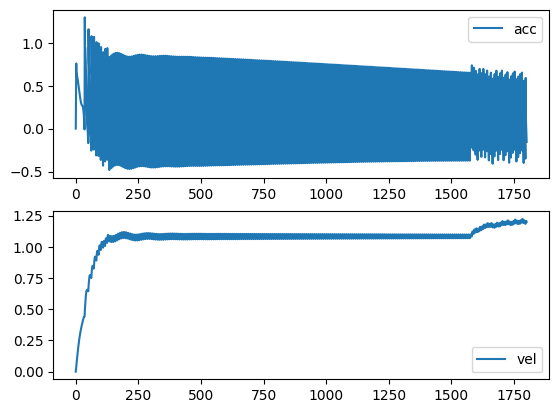

In [7]:

fix, ax = plt.subplots(2,1)
ax[0].plot(acc, label="acc")
ax[0].legend()
ax[1].plot(vel, label="vel")
ax[1].legend()

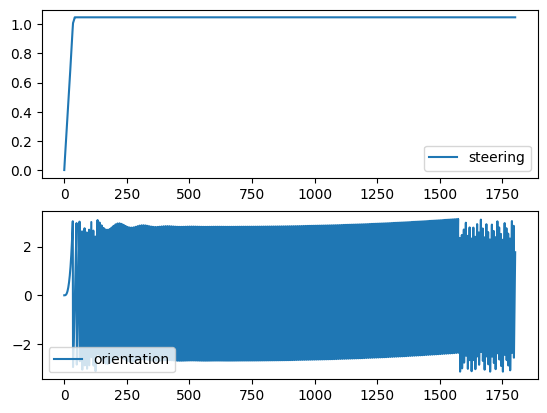

In [8]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(2,1)
ax[0].plot(steer, label='steering')
ax[0].legend()
ax[1].plot(orient, label="orientation")
ax[1].legend()

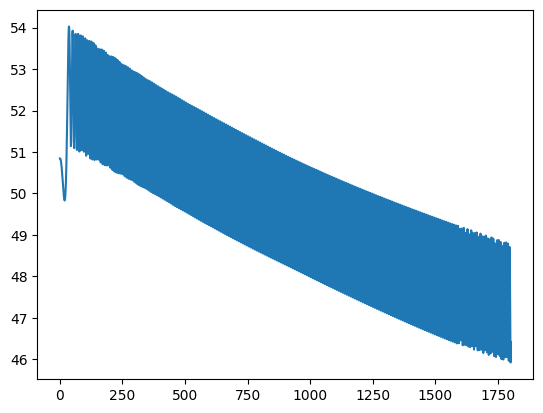

In [9]:
import scipy.spatial.distance as distance

dist = [distance.euclidean((x_, y_), (tgt_x, tgt_y)) for x_, y_ in zip(x, y)]

plt.plot(dist)

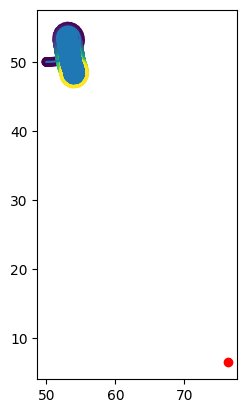

In [10]:
plt.plot(x, y)
plt.scatter(x, y, c=list(range(len(x))))
# plt.xlim(0, 100)
# plt.ylim(0, 100)
plt.scatter(tgt_x, tgt_y, c='r')
plt.gca().set_aspect("equal")


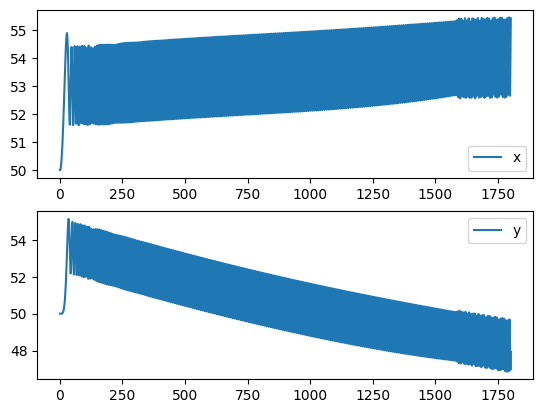

In [11]:
fig, ax = plt.subplots(2)
ax[0].plot(x, label="x")
ax[0].legend()
ax[1].plot(y, label="y")
ax[1].legend()

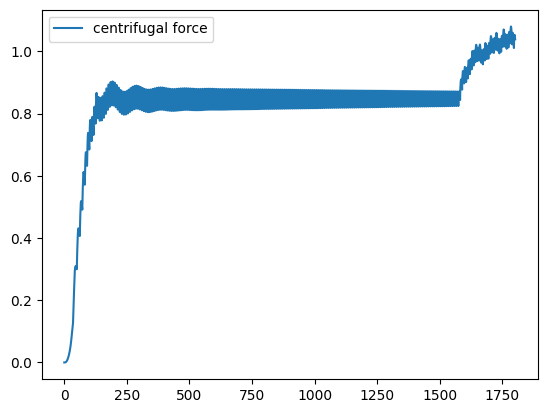

In [12]:
import numpy as np
l = 2.4  # wheel base
c_f = env.envs[0].env.car.centrifugal_force_amplitude
plt.plot([np.sign(v) * c_f(v, s) for v, s in zip(vel, steer)], label="centrifugal force")
plt.legend()